**Author:** Boris Kundu

**Problem Statement:** Housing price prediction by using neurtal network model for regression.

**Dataset:** https://www.kaggle.com/datasets/shivachandel/kc-house-data

In [41]:
#Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, explained_variance_score
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime
from random import randint
import math
import numpy as np

In [42]:
#Read and check data
hp = pd.read_csv('Housing-Prices-Data.csv')
hp.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [43]:
# Check data model
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [44]:
#Check stats
hp.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**Exploratory data analysis**

In [45]:
# Check for missing data
hp.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<Figure size 720x720 with 0 Axes>

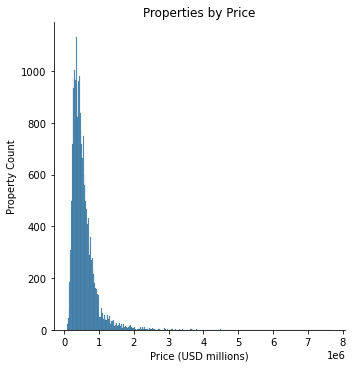

In [46]:
# Plot 'price' distribution
plt.figure(figsize=(10,10))
sns.displot(hp['price'])
plt.xlabel('Price (USD millions)')
plt.ylabel('Property Count')
plt.title('Properties by Price')
plt.show()

In [83]:
# Chek for most correlated features with price
hp.corr()['price'].sort_values(ascending=False)[1:]

sqft_living      0.701649
grade            0.668536
sqft_above       0.604714
sqft_living15    0.584839
bathrooms        0.525179
view             0.398725
sqft_basement    0.323105
lat              0.307079
bedrooms         0.306985
waterfront       0.272513
floors           0.255593
yr_renovated     0.126885
sqft_lot         0.090090
sqft_lot15       0.083291
yr_built         0.051894
condition        0.035831
long             0.022517
year             0.003906
month           -0.010176
Name: price, dtype: float64

<AxesSubplot:>

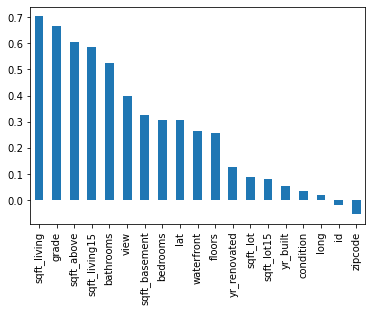

In [48]:
# Check features most correlated to 'price'
hp.corr()['price'].sort_values(ascending=False)[1:].plot(kind='bar')

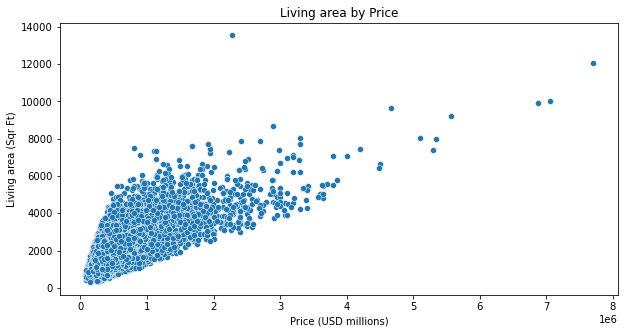

In [49]:
# Plot price against area
plt.figure(figsize=(10,5))
sns.scatterplot(x='price',y='sqft_living',data=hp)
plt.title('Living area by Price')
plt.xlabel('Price (USD millions)')
plt.ylabel('Living area (Sqr Ft)')
plt.show()

In [50]:
# Exclude top 1% most expensive house as they are like outliers
idx = math.floor(len(hp)*.01)
hp_bottom_99 = hp.sort_values('price',ascending=False).iloc[idx:]

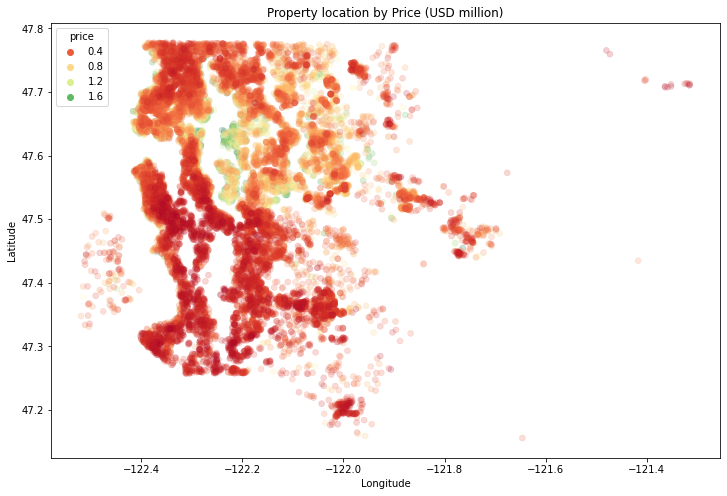

In [51]:
# Plot longitude vs latitude by price
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=hp_bottom_99, hue='price', alpha=0.2, palette='RdYlGn', edgecolor=None)
plt.title('Property location by Price (USD million)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

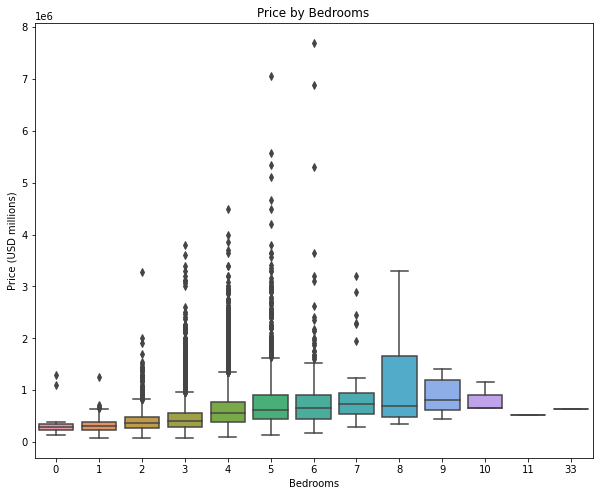

In [52]:
# Plot price vs bedrooms
plt.figure(figsize=(10,8))
sns.boxplot(x='bedrooms',y='price',data=hp)
plt.title('Price by Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price (USD millions)')
plt.show()

In [53]:
# Drop 'id'
hp = hp.drop('id',axis=1)

In [54]:
# Remove property records with 0 bedrooms
hp.drop(hp[hp['bedrooms'] < 1].index, inplace = True)

In [55]:
# Remove property records with 0 bathrooms
hp.drop(hp[hp['bathrooms'] < 1].index, inplace = True)

In [56]:
# Drop incomplete records
hp.dropna(inplace=True)

In [57]:
# Convert to datetime format
hp['date'] = pd.to_datetime(hp['date'])

In [58]:
# Get year from date
hp['year'] = hp['date'].apply(lambda date: date.year)

In [59]:
# Get month from date
hp['month'] = hp['date'].apply(lambda date: date.month)

<AxesSubplot:xlabel='month'>

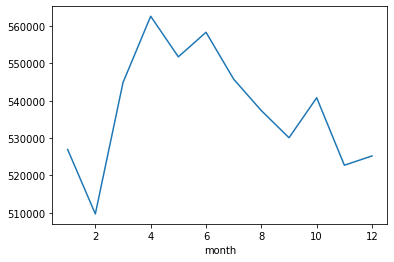

In [60]:
# Plot mean price by month
hp.groupby('month').mean()['price'].plot()

In [61]:
# Drop date
hp = hp.drop(['date'],axis = 1)

In [62]:
# Drop zipcode
hp = hp.drop(['zipcode'],axis = 1)

**Predictive Modeling**

In [63]:
# Reset index
hp = hp.reset_index(drop=True)

In [64]:
# Define input features output feature
X = hp.drop(['price'],axis=1).values
y = hp['price'].values

In [65]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 87)

In [66]:
# Scale features
scaler = StandardScaler()
#Scale train and test features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
# Create deep learning model with layers
model = Sequential()

model.add(Dense(19,activation='relu'))
#30% of the neurons in the above layer will be turned off randomly in every batch
model.add(Dropout(0.3))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(19,activation='relu'))

model.add(Dense(1)) # Output layer

#Define optimizer as adam and loss function as mean squared error
model.compile(optimizer='adam', loss='mse')

In [68]:
# Add early stop
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 40, verbose = 1)

In [69]:
# Train model
model.fit(x = X_train, y = y_train, validation_data = (X_test,y_test), epochs = 500, callbacks = [early_stop])

Epoch 1/500
471/471 [==============================] - 0s 1ms/step - loss: 258211758080.0000 - val_loss: 59282558976.0000
Epoch 2/500
471/471 [==============================] - 0s 923us/step - loss: 76120637440.0000 - val_loss: 46606327808.0000
Epoch 3/500
471/471 [==============================] - 0s 867us/step - loss: 66971369472.0000 - val_loss: 41946664960.0000
Epoch 4/500
471/471 [==============================] - 0s 903us/step - loss: 64002592768.0000 - val_loss: 39578345472.0000
Epoch 5/500
471/471 [==============================] - 0s 887us/step - loss: 60080611328.0000 - val_loss: 37429985280.0000
Epoch 6/500
471/471 [==============================] - 0s 847us/step - loss: 56719843328.0000 - val_loss: 36264366080.0000
Epoch 7/500
471/471 [==============================] - 0s 774us/step - loss: 56887291904.0000 - val_loss: 35545337856.0000
Epoch 8/500
471/471 [==============================] - 0s 844us/step - loss: 57965080576.0000 - val_loss: 35008884736.0000
Epoch 9/500
471/4

471/471 [==============================] - 0s 848us/step - loss: 42043600896.0000 - val_loss: 30325233664.0000
Epoch 66/500
471/471 [==============================] - 0s 913us/step - loss: 44457365504.0000 - val_loss: 29580464128.0000
Epoch 67/500
471/471 [==============================] - 0s 889us/step - loss: 42838732800.0000 - val_loss: 29589975040.0000
Epoch 68/500
471/471 [==============================] - 0s 940us/step - loss: 43758891008.0000 - val_loss: 29669724160.0000
Epoch 69/500
471/471 [==============================] - 0s 865us/step - loss: 42559549440.0000 - val_loss: 29726464000.0000
Epoch 70/500
471/471 [==============================] - 0s 862us/step - loss: 44284010496.0000 - val_loss: 29483173888.0000
Epoch 71/500
471/471 [==============================] - 0s 900us/step - loss: 43303366656.0000 - val_loss: 29495861248.0000
Epoch 72/500
471/471 [==============================] - 0s 901us/step - loss: 44157853696.0000 - val_loss: 29483616256.0000
Epoch 73/500
471/471 

Epoch 131/500
471/471 [==============================] - 0s 791us/step - loss: 42511110144.0000 - val_loss: 28046305280.0000
Epoch 132/500
471/471 [==============================] - 0s 879us/step - loss: 42159800320.0000 - val_loss: 28226660352.0000
Epoch 133/500
471/471 [==============================] - 0s 803us/step - loss: 43077832704.0000 - val_loss: 28335945728.0000
Epoch 134/500
471/471 [==============================] - 0s 826us/step - loss: 40530690048.0000 - val_loss: 28063717376.0000
Epoch 135/500
471/471 [==============================] - 0s 861us/step - loss: 41333112832.0000 - val_loss: 28045279232.0000
Epoch 136/500
471/471 [==============================] - 0s 887us/step - loss: 41386151936.0000 - val_loss: 28101902336.0000
Epoch 137/500
471/471 [==============================] - 0s 786us/step - loss: 40851152896.0000 - val_loss: 28225005568.0000
Epoch 138/500
471/471 [==============================] - 0s 783us/step - loss: 41723355136.0000 - val_loss: 27994245120.0000


471/471 [==============================] - 0s 834us/step - loss: 39226208256.0000 - val_loss: 27920138240.0000
Epoch 197/500
471/471 [==============================] - 0s 821us/step - loss: 41173655552.0000 - val_loss: 27923523584.0000
Epoch 198/500
471/471 [==============================] - 0s 826us/step - loss: 40072773632.0000 - val_loss: 28911890432.0000
Epoch 199/500
471/471 [==============================] - 0s 834us/step - loss: 39512485888.0000 - val_loss: 28095764480.0000
Epoch 200/500
471/471 [==============================] - 0s 843us/step - loss: 40057401344.0000 - val_loss: 27908521984.0000
Epoch 201/500
471/471 [==============================] - 0s 822us/step - loss: 41354076160.0000 - val_loss: 27876610048.0000
Epoch 202/500
471/471 [==============================] - 0s 843us/step - loss: 40978538496.0000 - val_loss: 28155226112.0000
Epoch 203/500
471/471 [==============================] - 0s 850us/step - loss: 39691640832.0000 - val_loss: 28506193920.0000
Epoch 204/500


<AxesSubplot:>

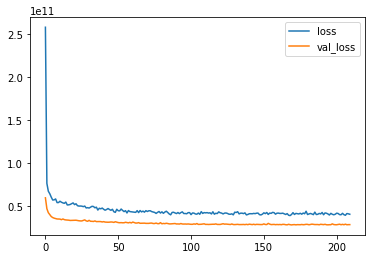

In [70]:
# Get epoch losses
losses = pd.DataFrame(model.history.history)
# Plot loss
losses.plot()

In [71]:
# Get predictions on test
predictions = model.predict(X_test)

In [72]:
# Calculate mean squared error
mse = mean_squared_error(y_test,predictions)
print(f'Mean squared error:{mse}')

Mean squared error:28017169855.961655


In [73]:
rmse = mse**0.5
print(f'Root Mean squared error:{rmse}')

Root Mean squared error:167383.30220174787


In [74]:
# Check variance score
evs = explained_variance_score(y_test,predictions)
#1 is best
print(f'Explained variance score:{evs}')

Explained variance score:0.7890521484617162


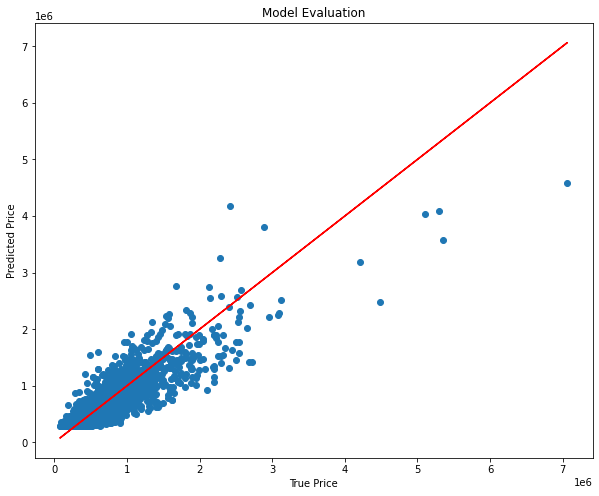

In [75]:
# Plot predictions
plt.figure(figsize=(10,8))
plt.title('Model Evaluation')
plt.scatter(y_test,predictions)
# Perfect predictions
plt.plot(y_test,y_test,'r')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.show()

In [76]:
# Save model
save_model(model,'housing_price_model')

INFO:tensorflow:Assets written to: housing_price_model\assets


In [77]:
# Load saved model
hp_model = load_model('housing_price_model')

In [78]:
# Function to predict on random data points
def newPredictions(model):
    #Take a random data point as a new property
    new_property_loc = randint(0,len(hp)-1)
    # Any new property data point
    new_property = hp.drop(['price'],axis=1).iloc[new_property_loc].values
    # Scale its features
    new_scaled_prop = scaler.transform(new_property.reshape(-1,19))
    # Predict price of new property
    new_prop_predicted_price = model.predict(new_scaled_prop)
    print(f"New property location:{new_property_loc}\nActual price:{hp['price'][new_property_loc]}\nPredicted price:{new_prop_predicted_price}\n")

In [79]:
# Predict on random data points
for i in range(5):
    newPredictions(hp_model)

New property location:4686
Actual price:827500.0
Predicted price:[[531586.9]]

New property location:13091
Actual price:315275.0
Predicted price:[[405023.44]]

New property location:14261
Actual price:340000.0
Predicted price:[[440500.7]]

New property location:9191
Actual price:169100.0
Predicted price:[[295025.22]]

New property location:18911
Actual price:270000.0
Predicted price:[[295025.22]]



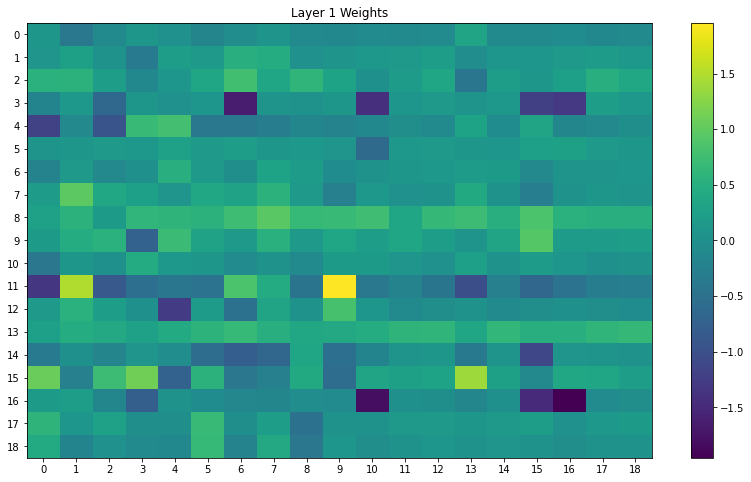

In [80]:
fig, ax = plt.subplots(figsize=(14,8)) # width and height in inches
im = ax.imshow(hp_model.get_weights()[0], origin='upper', aspect='auto', interpolation='None')

n_1 = np.arange(19)
n_2 = np.arange(19)
tick_interval = 1
ax.set_yticks(n_2[::tick_interval])
ax.set_xticks(n_1[::tick_interval])
ax.set_title('Layer 1 Weights')
# Colorbar
cbar = fig.colorbar(im)